# Telecom Churn Data Analytics And Model selection using TPOT

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline

In [ ]:
#importing dataset
telcom = pd.read_csv("churn80.csv")
telcom_test = pd.read_csv("churn20.csv")
telcom.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [ ]:
telcom_test.head()

State  Account length  ...  Customer service calls  Churn
0    LA             117  ...                       1  False
1    IN              65  ...                       4   True
2    NY             161  ...                       4   True
3    SC             111  ...                       2  False
4    HI              49  ...                       1  False

[5 rows x 20 columns]

In [ ]:
def dataoveriew(telcom, message):
    print(f'{message}:\n')
    print("Rows:", telcom.shape[0])
    print("\nNumber of features:", telcom.shape[1])
    print("\nFeatures:")
    print(telcom.columns.tolist())
    print("\nMissing values:", telcom.isnull().sum().values.sum())
    print("\nUnique values:")
    print(telcom.nunique())

In [ ]:
dataoveriew(telcom, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         15

In [ ]:
dataoveriew(telcom_test, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 667

Number of features: 14

Features:
['International plan', 'Voice mail plan', 'Churn', 'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']

Missing values: 0

Unique values:
International plan          2
Voice mail plan             2
Churn                       2
Account length            179
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total eve minutes         557
Total eve calls            94
Total night minutes       568
Total night calls          96
Total intl minutes        132
Total intl calls           17
Customer service calls      9
dtype: int64


## Exploratory Data Analysis

In [ ]:
telcom.describe()

Account length    Area code  ...  Total intl charge  Customer service calls
count     2666.000000  2666.000000  ...        2666.000000             2666.000000
mean       100.620405   437.438860  ...           2.764490                1.562641
std         39.563974    42.521018  ...           0.752812                1.311236
min          1.000000   408.000000  ...           0.000000                0.000000
25%         73.000000   408.000000  ...           2.300000                1.000000
50%        100.000000   415.000000  ...           2.750000                1.000000
75%        127.000000   510.000000  ...           3.270000                2.000000
max        243.000000   510.000000  ...           5.400000                9.000000

[8 rows x 16 columns]

In [ ]:
telcom_test.describe()

Account length   Area code  ...  Total intl charge  Customer service calls
count      667.000000  667.000000  ...         667.000000              667.000000
mean       102.841079  436.157421  ...           2.764948                1.563718
std         40.819480   41.783305  ...           0.758167                1.333357
min          1.000000  408.000000  ...           0.000000                0.000000
25%         76.000000  408.000000  ...           2.320000                1.000000
50%        102.000000  415.000000  ...           2.840000                1.000000
75%        128.000000  415.000000  ...           3.255000                2.000000
max        232.000000  510.000000  ...           4.940000                8.000000

[8 rows x 16 columns]

In [ ]:
print('The percentage of customers churning from the company is: %{}'.format((telcom['Churn'].sum()) *100/telcom.shape[0]) )

The percentage of customers churning from the company is: %14.553638409602401


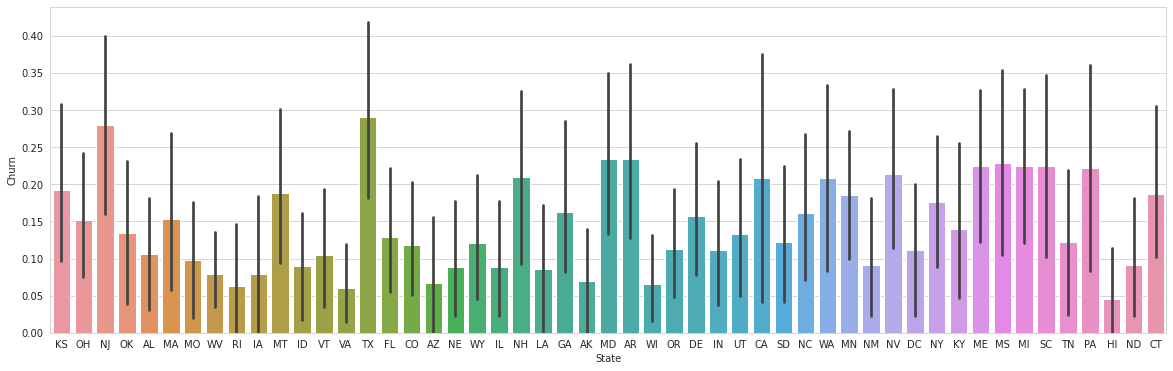

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=telcom)

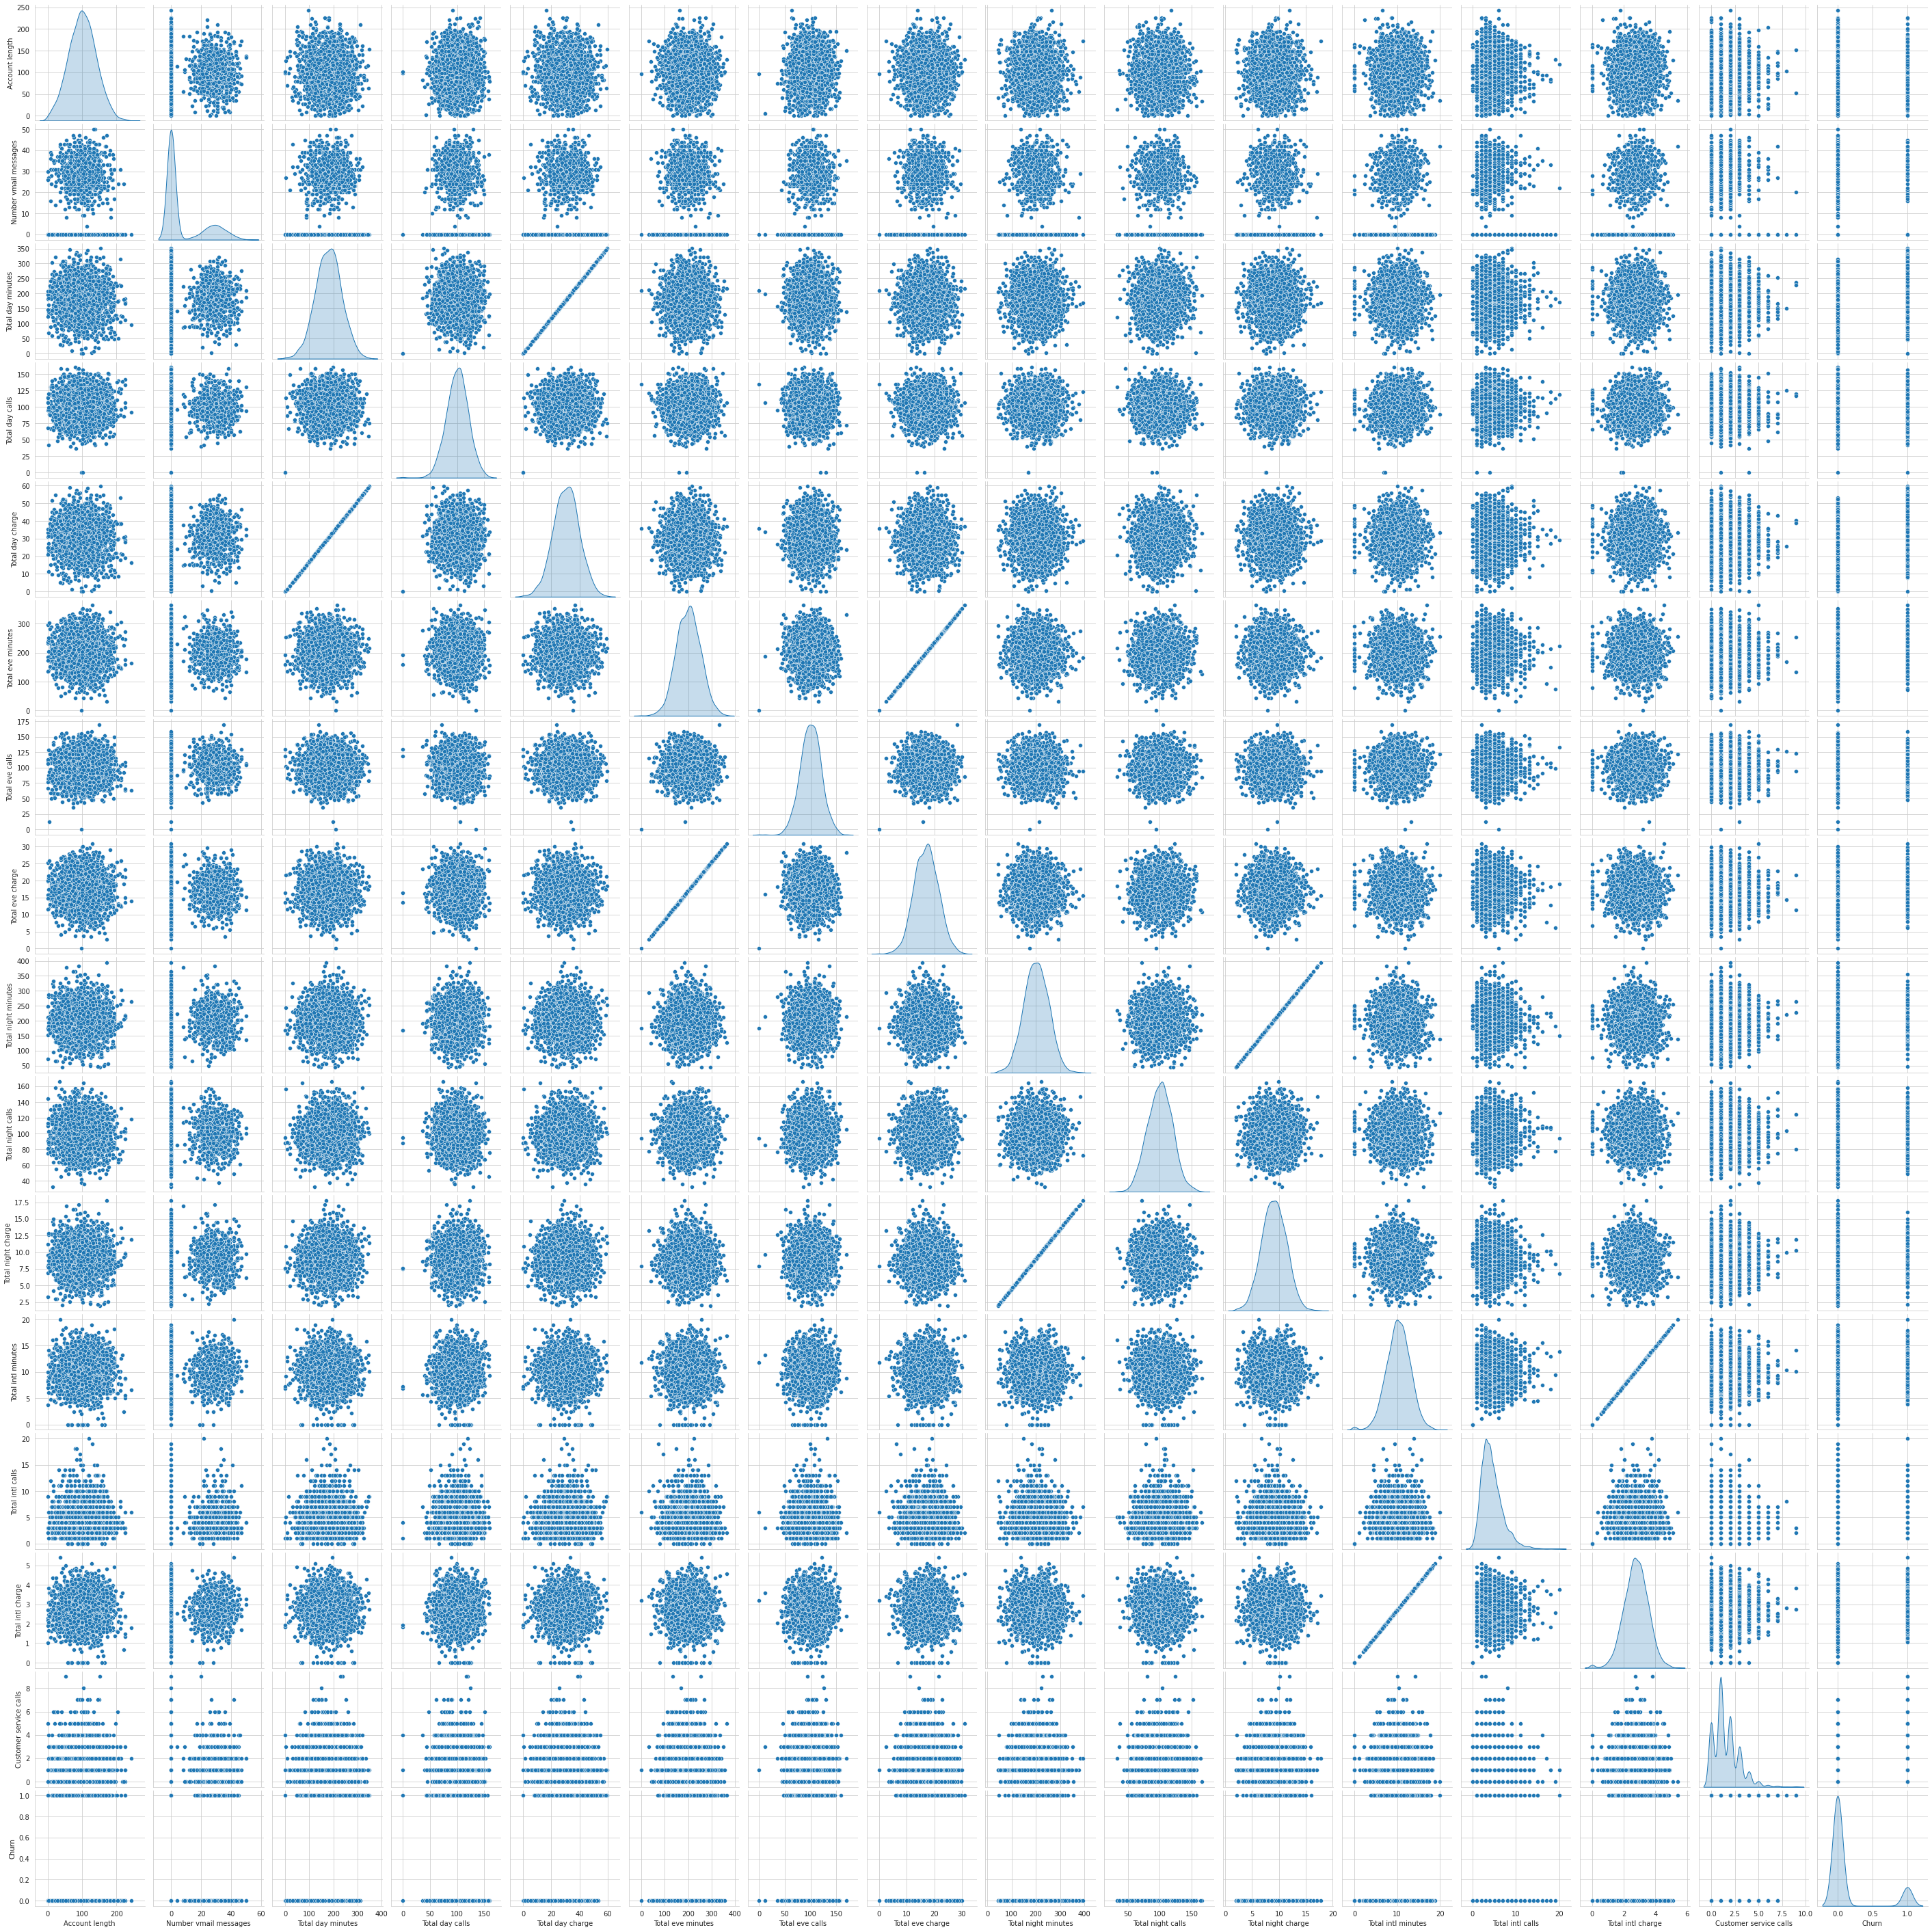

In [ ]:
#Scatter plot for finding relation between all features
out_cols = list(set(telcom.nunique()[telcom.nunique()<6].keys().tolist()
                    + telcom.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in telcom.columns if x not in out_cols] + ['Churn']

sns.pairplot(telcom[viz_cols], diag_kind="kde")
plt.show()

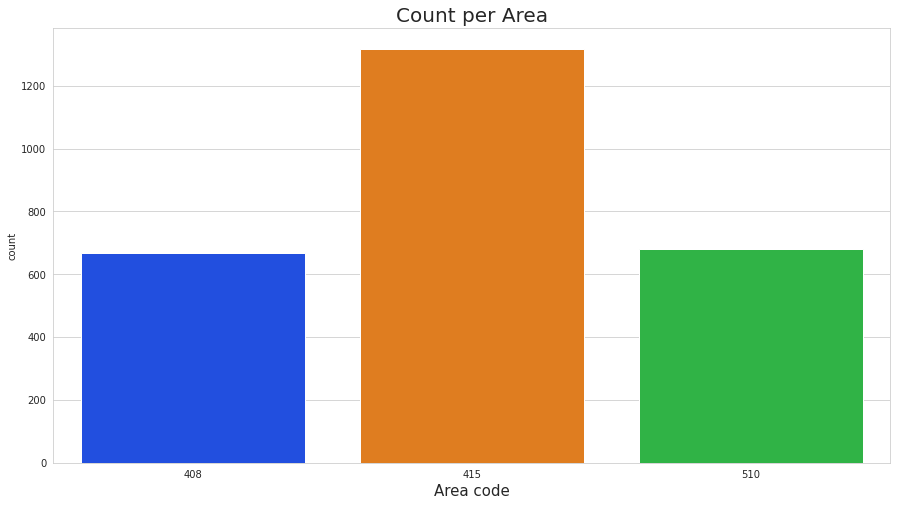

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
sns.countplot(telcom["Area code"],palette = "bright")
plt.title("Count per Area",fontsize=20)
plt.xlabel("Area code",fontsize=15)
plt.show()

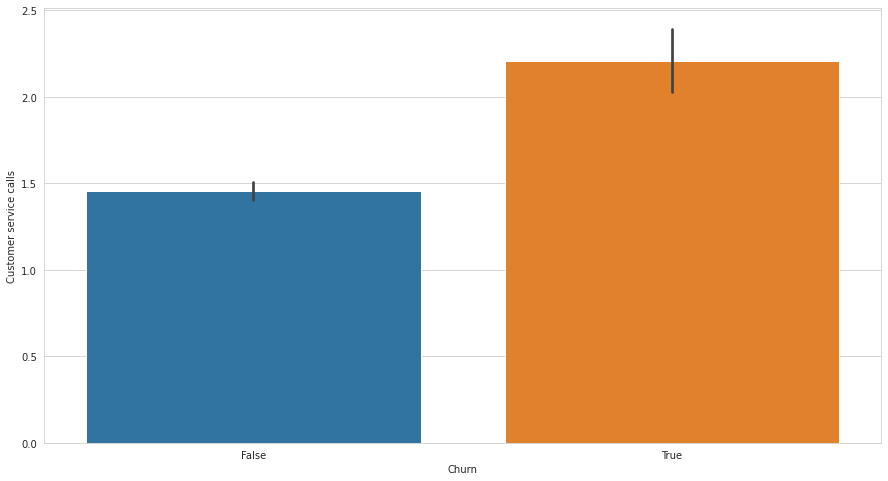

In [ ]:
sns.barplot(x='Churn', y='Customer service calls',data=telcom)

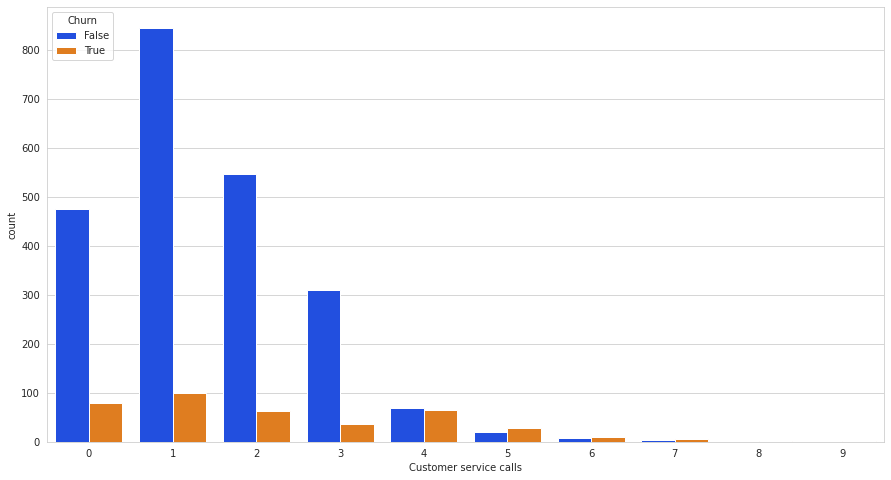

In [ ]:
sns.countplot(telcom["Customer service calls"],hue = telcom["Churn"],palette = "bright")

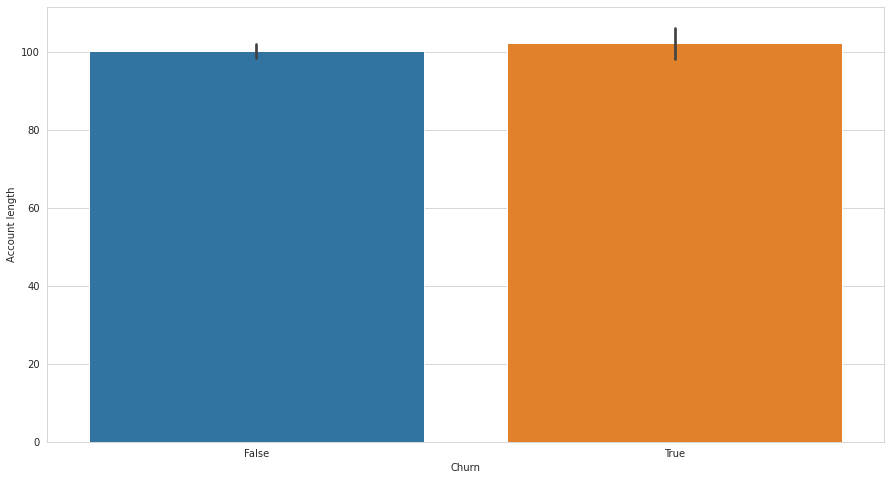

In [ ]:
sns.barplot(x='Churn', y='Account length',data=telcom)

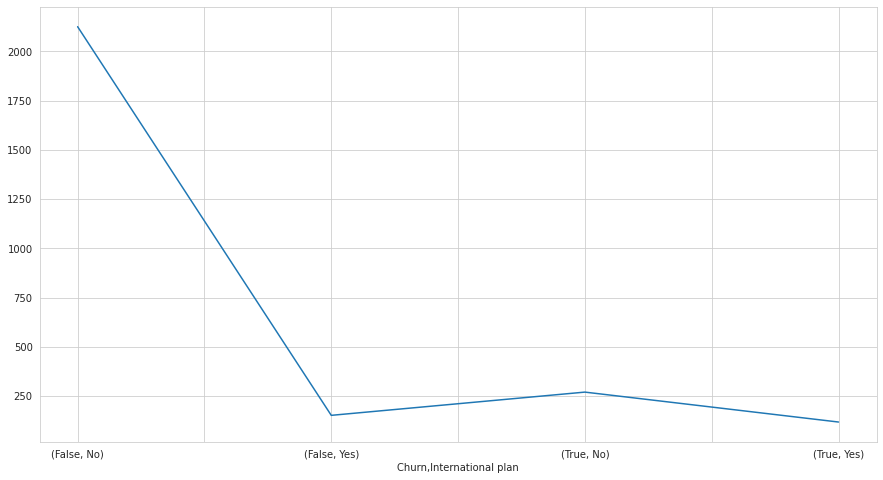

In [ ]:
churn_intl = telcom.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()

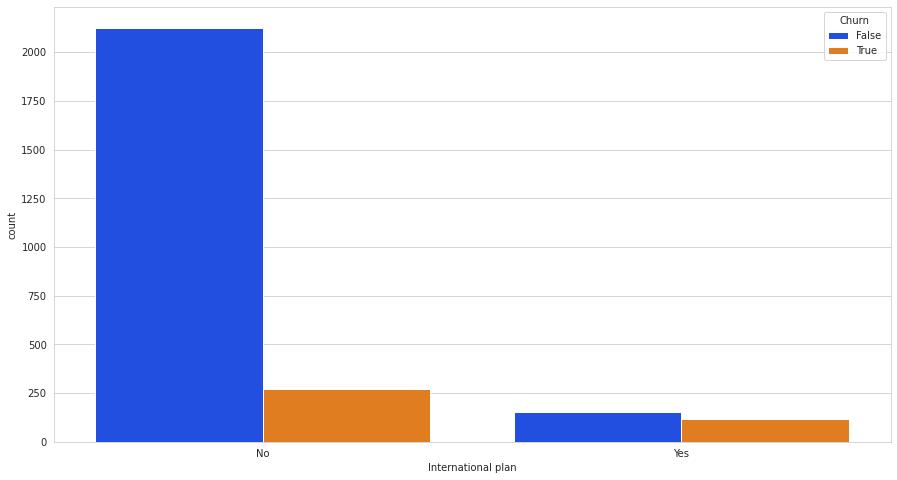

In [ ]:
sns.countplot(telcom["International plan"],hue = telcom["Churn"],palette = "bright")

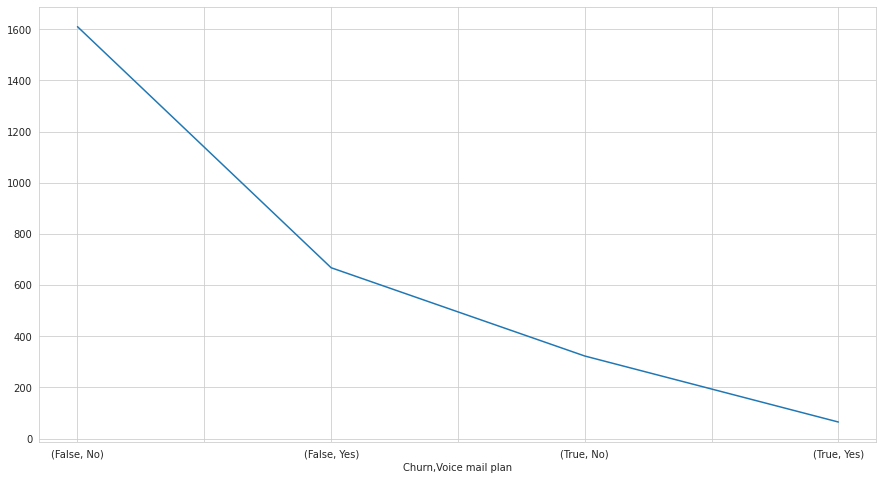

In [ ]:
churn_voicem = telcom.groupby(['Churn','Voice mail plan']).size()
churn_voicem.plot()
plt.show()

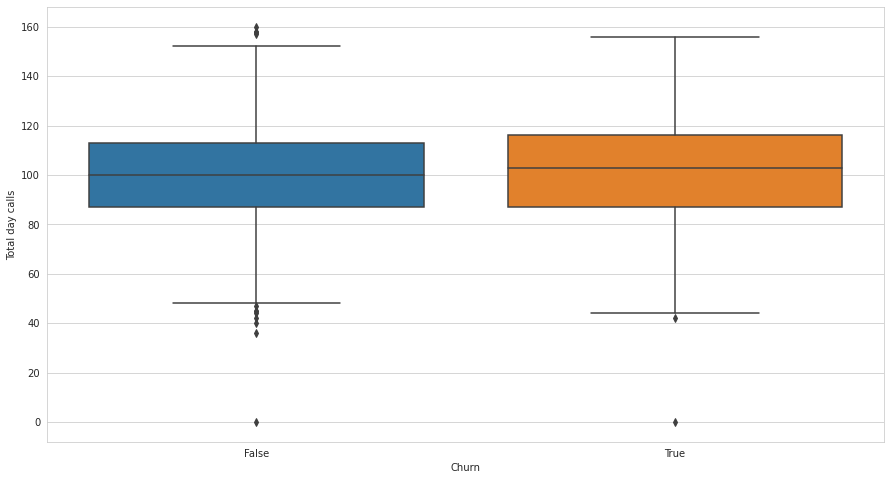

In [ ]:
sns.boxplot(x=telcom["Churn"],y=telcom["Total day calls"])

In [ ]:
telcom['Total charge'] = telcom['Total day charge'] + telcom['Total eve charge'] + telcom['Total night charge'] + telcom['Total intl charge']
telcom_test['Total charge'] = telcom_test['Total day charge'] + telcom_test['Total eve charge'] + telcom_test['Total night charge'] + telcom_test['Total intl charge']

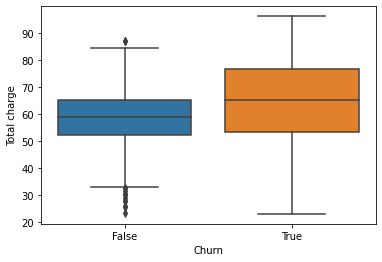

In [ ]:
sns.boxplot(x='Churn',y='Total charge', data = telcom)

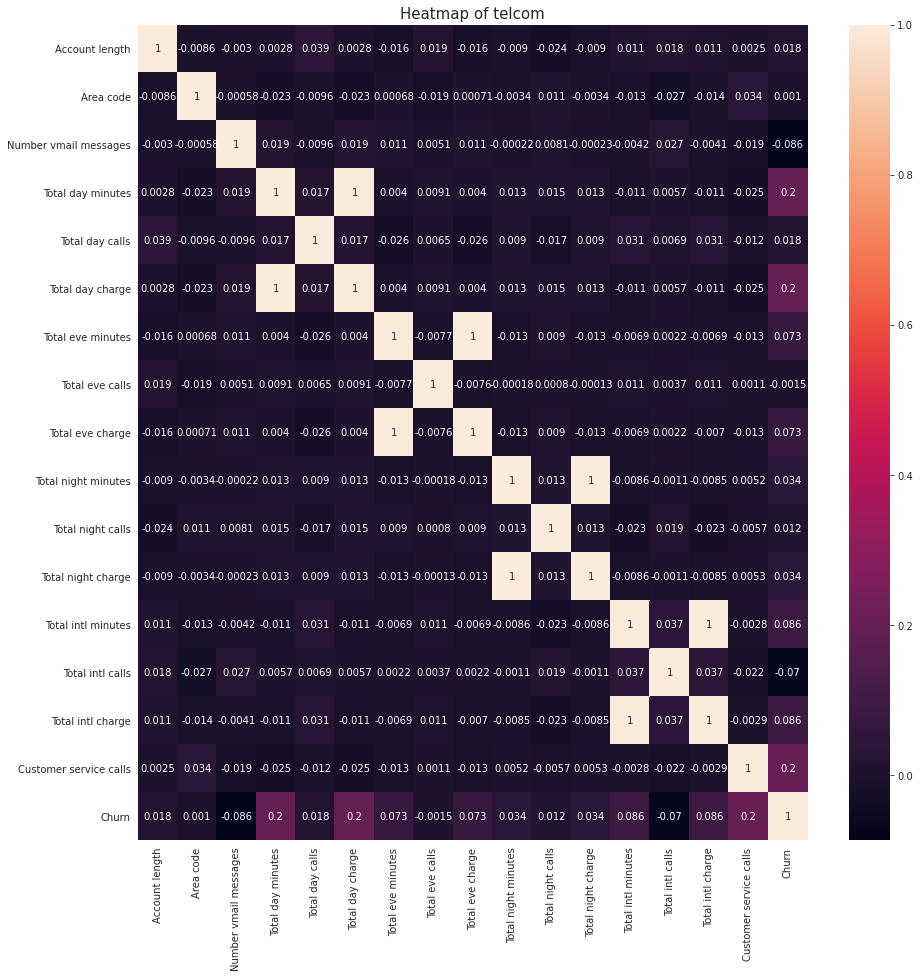

In [ ]:
#Pearson co-relation matrix
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(telcom[:].corr(),annot = True)
plt.title("Heatmap of telcom",fontsize= 15)
plt.show()

## DATA PREPROCESSING 

In [ ]:
#DATA PREPROCESSING
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
   
telcom = telcom.drop(columns = col_to_drop, axis = 1)
telcom_test = telcom_test.drop(columns = col_to_drop, axis = 1)

#target column
target_col = ["Churn"]

#number of levels in feature to be a categorical feature
nlevels = 6

#Separating categorical and numerical columns
#categorical columns
cat_cols = list(set(telcom.nunique()[telcom.nunique()<nlevels].keys().tolist() 
                    + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    telcom[i] = le.fit_transform(telcom[i])
    telcom_test[i] = le.transform(telcom_test[i])

#combining the train and test datasets
trainsize = telcom.shape[0]
comb = pd.concat((telcom, telcom_test), sort=False)

#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

#Separating the train and test datasets
telcom = comb[:trainsize]
telcom_test = comb[trainsize:]

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = telcom_test.copy()
telcom_test = telcom_test.drop(columns = num_cols, axis = 1)
telcom_test = telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

In [ ]:
telcom.head()

International plan  ...  Customer service calls
0                   0  ...               -0.429172
1                   0  ...               -0.429172
2                   0  ...               -1.191955
3                   1  ...                0.333610
4                   1  ...                1.096392

[5 rows x 14 columns]

In [ ]:
telcom_test.head()

International plan  ...  Customer service calls
0                   0  ...               -0.429172
1                   0  ...                1.859175
2                   0  ...                1.859175
3                   0  ...                0.333610
4                   0  ...               -0.429172

[5 rows x 14 columns]

In [ ]:
telcom.shape

(2666, 14)

In [ ]:
telcom_test.shape

(667, 14)

## Classiiction

In [ ]:
X_train = telcom.drop("Churn", axis=1)
y_train = telcom['Churn']
X_test = telcom_test.drop("Churn", axis=1)
y_test = telcom_test['Churn']


In [ ]:
from sklearn  import ensemble
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)

from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)

from sklearn.svm import SVC
svc_cl = SVC(kernel = 'rbf', random_state = 0)
svc_cl.fit(X_train, y_train)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)


from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'


acc_adb = cross_val_score(estimator = adaboost, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_adb.mean()


acc_gbbost = cross_val_score(estimator = gboost, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gbbost.mean()

acc_dec1 = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dec1.mean()

acc_gaussion1 = cross_val_score(estimator = gaussian, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gaussion1.mean()

acc_knn1 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn1.mean()

acc_random1 = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_random1.mean()

acc_log_reg1 = cross_val_score(estimator = logistic_reg, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_log_reg1.mean()

acc_sgd1 = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_sgd1.mean()

acc_svc1 = cross_val_score(estimator = svc_cl, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_svc1.mean()

0.9028399650812423

In [ ]:
models_cross = pd.DataFrame({
    'Model': ['AdaBoost','GradientBoosting','Support Vector Machines','Stochastic Gradient Decent','Logistic Regression', 
              'Random Forest','Decision Tree', 'Guassian Naive Bayes', 'Kneighbours'],
    'Score': [acc_adb.mean(),acc_gbbost.mean(),acc_svc1.mean(),acc_sgd1.mean(), acc_log_reg1.mean(), 
              acc_random1.mean(),acc_dec1.mean(), acc_gaussion1.mean(), acc_knn1.mean()]})
    
models_cross.sort_values(by='Score', ascending=False)



Model     Score
1            GradientBoosting  0.950111
5               Random Forest  0.926830
6               Decision Tree  0.905098
2     Support Vector Machines  0.902840
8                 Kneighbours  0.879568
0                    AdaBoost  0.871344
4         Logistic Regression  0.863075
3  Stochastic Gradient Decent  0.854065
7        Guassian Naive Bayes  0.851826

In [ ]:
#Use TPOT classifier to find the best model algorithm that fits the data. TPOT uses genetic algorithm based search internally
!pip install tpot

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 157.5MB 74kB/s 
     |████████████████████████████████| 163kB 52.9MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=6eedff569f3964c32b37eca5fcda8fd3122225a3373462fedab27af57d9dd8a2
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import  TPOTClassifier
import multiprocessing

if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot =  TPOTClassifier(generations=5, population_size=30, verbosity=3,n_jobs = 20, random_state=50)
    tpot.fit(X_train, y_train)

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.9478613740329278	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.6000000000000001, GradientBoostingClassifier__min_samples_leaf=19, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.5)
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shap

In [ ]:
print(tpot.score(X_test, y_test))

0.95952023988006


In [ ]:
#Exporting the scikit learn code for best classifier and dispay the code
tpot.export('tpot_churn_pipeline.py')
!cat tpot_churn_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=50)

# Average CV score on the training set was: 0.9546127846758156
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.7500000000000001, min_samples_leaf=17, min_samp

In [ ]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestClassifier(bootstrap=True,
                                                                    ccp_alpha=0.0,
                                                                    class_weight=None,
                                                                    criterion='gini',
                                                                    max_depth=None,
                                                                    max_features=0.7500000000000001,
                                                                    max_leaf_nodes=None,
                                                                    max_samples=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                    